In [1]:
import matplotlib.pyplot as plt
import pandas as pd


def plotData(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    #to filter rows based on date range
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')

    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    

    if(name!="^VIX"):
        color = 'tab:red'
        ax1.set_xlabel('DATE', fontsize=18) 
        ax1.set_ylabel('VOLUME', color=color, fontsize=18)
        ax1.plot(stock_data['Volume'], color=color, linewidth=2) 
        ax1.grid(True)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('ADJUSTED CLOSE PRICE', color=color, fontsize=18) 
    ax2.plot(stock_data['Adj Close'], color=color, linewidth=2) 
    plt.title('Volume and ADJUSTED CLOSE PRICE of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    plt.show()
    






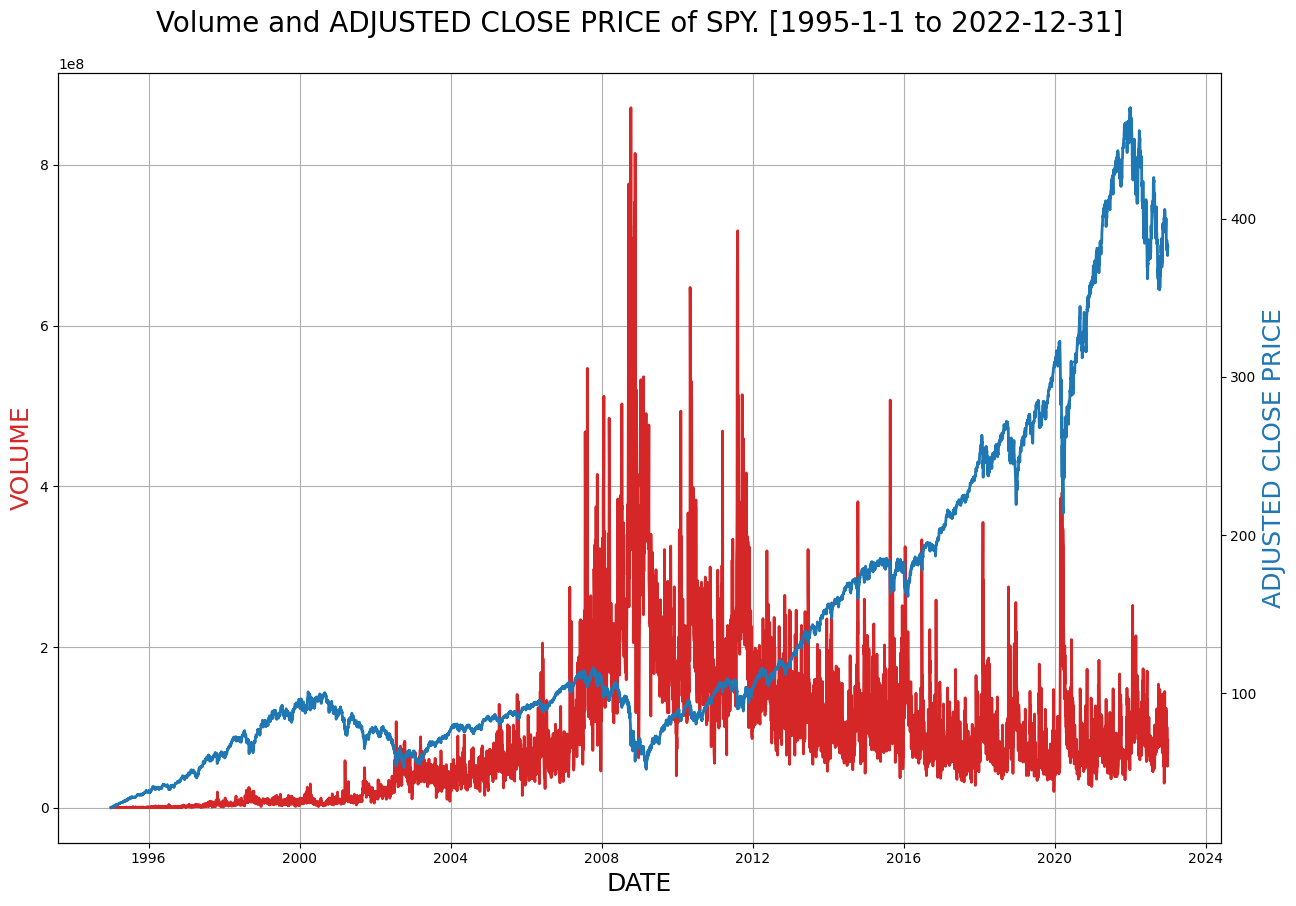

In [2]:
plotData("SPY",'1995-1-1','2022-12-31')

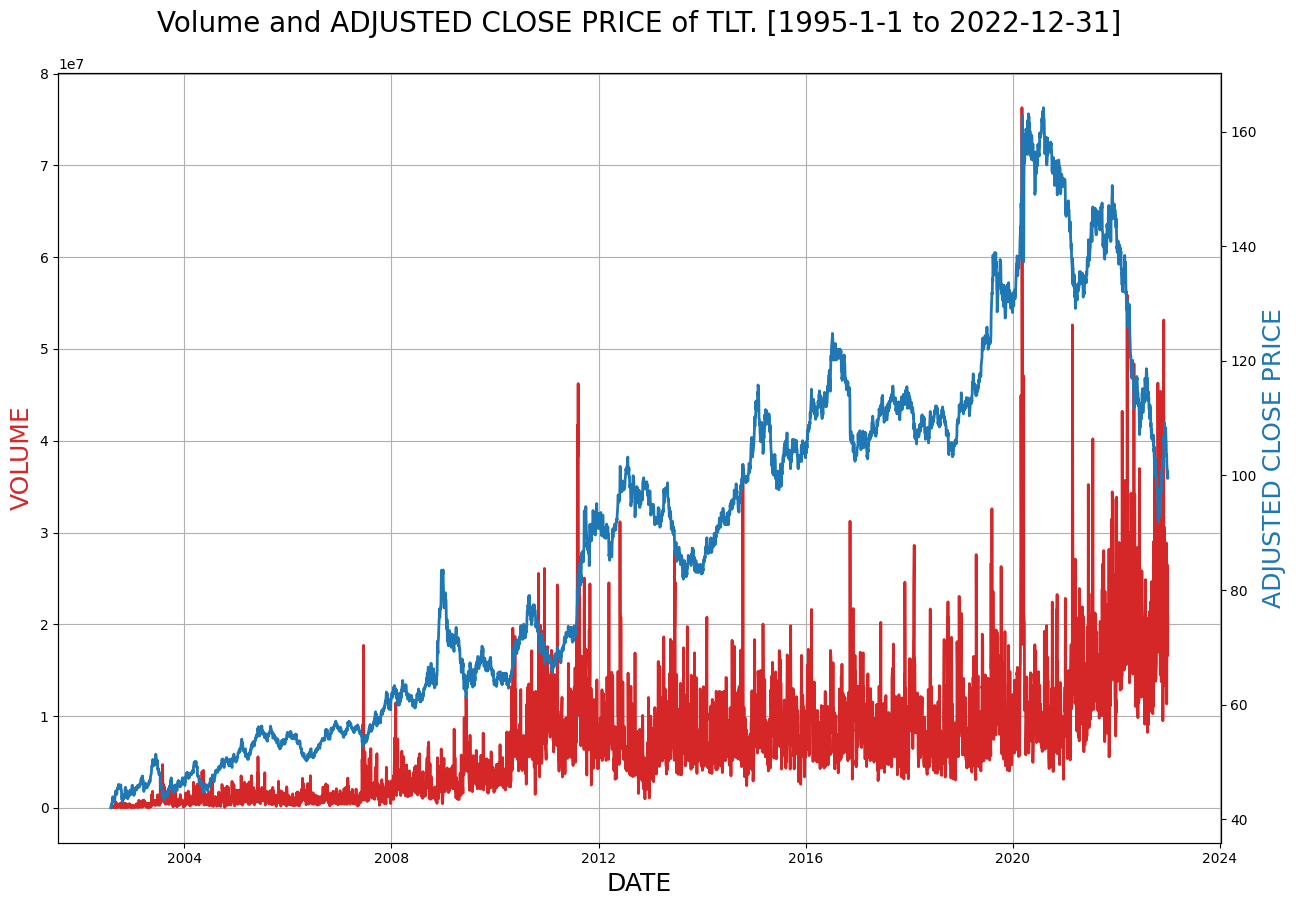

In [3]:
plotData("TLT",'1995-1-1','2022-12-31')

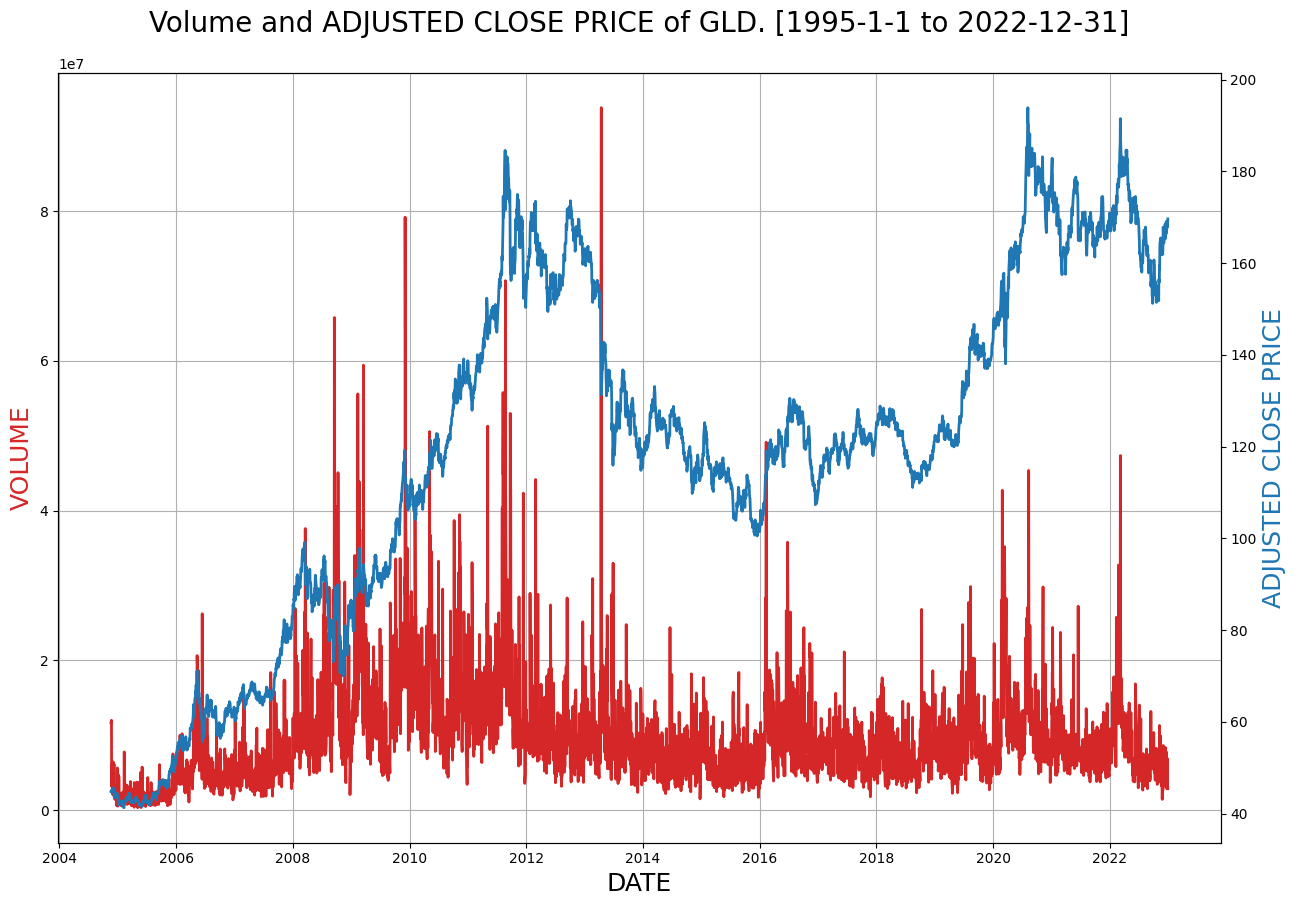

In [4]:
plotData("GLD",'1995-1-1','2022-12-31')

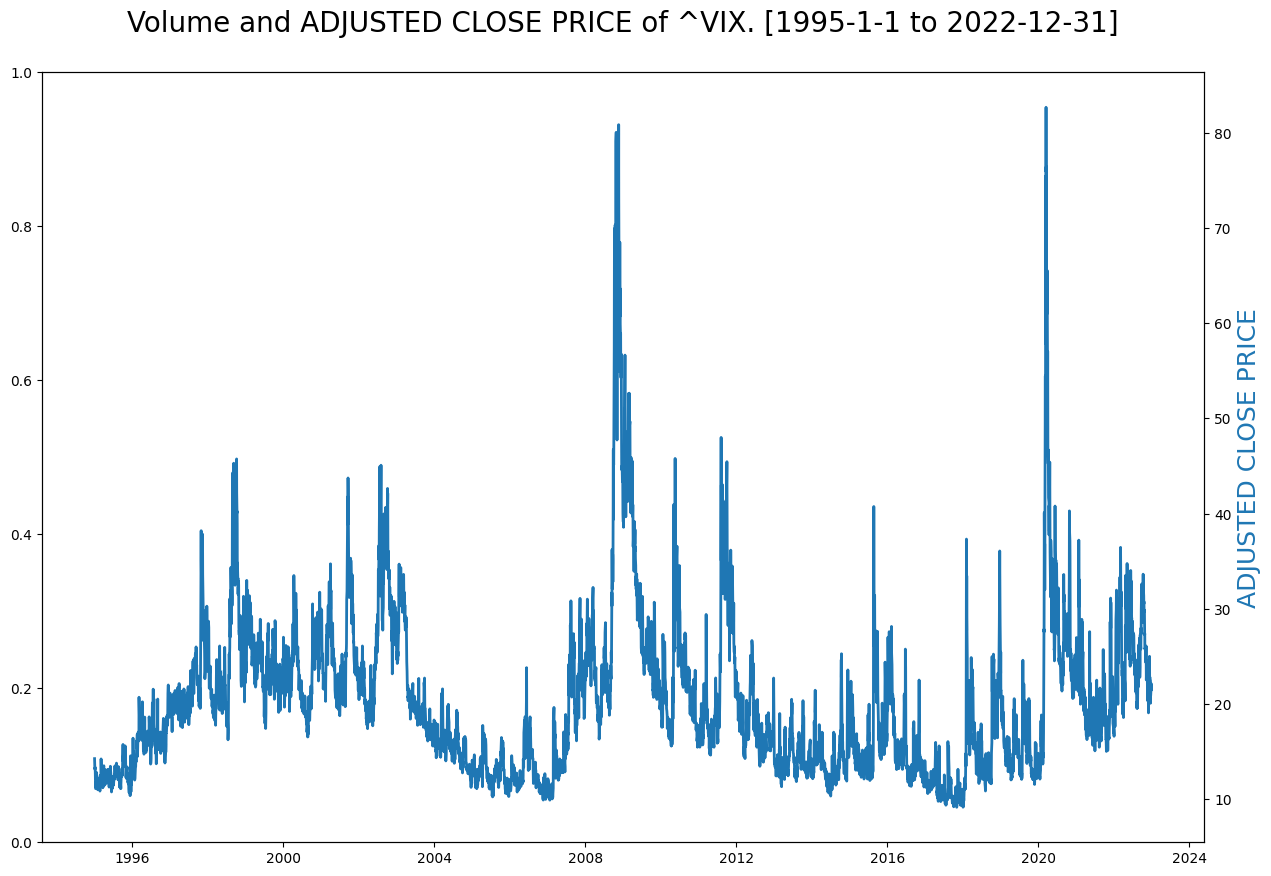

In [5]:
plotData("^VIX",'1995-1-1','2022-12-31')

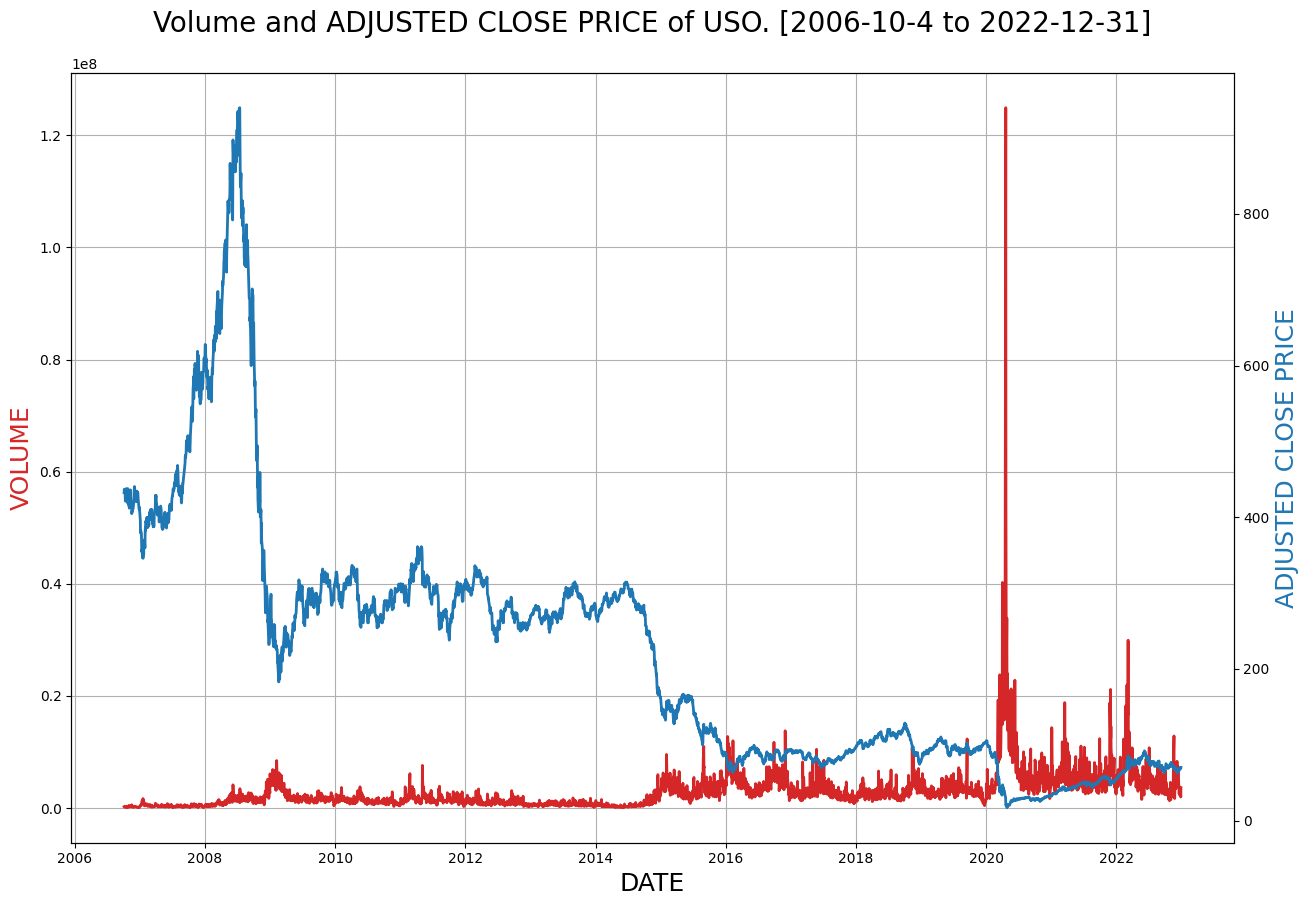

In [6]:
plotData("USO",'2006-10-4','2022-12-31')

In [7]:
def MAX(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    
    maximum_value=max(stock_data['High'])
    print(maximum_value)
    
MAX("SPY",'1995-1-1','2022-12-31')
MAX("TLT",'1995-1-1','2022-12-31')
MAX("GLD",'1995-1-1','2022-12-31')
MAX("^VIX",'1995-1-1','2022-12-31')
MAX("USO",'2006-10-4','2022-12-31')    

479.980011
179.699997
194.449997
89.529999
953.359985


In [8]:
def MIN(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    
    minimum_value=min(stock_data['Low'])
    print(minimum_value)
    
MIN("SPY",'1995-1-1','2022-12-31')
MIN("TLT",'1995-1-1','2022-12-31')
MIN("GLD",'1995-1-1','2022-12-31')
MIN("^VIX",'1995-1-1','2022-12-31')
MIN("USO",'2006-10-4','2022-12-31')    

45.6875
80.510002
41.02
8.56
16.879999


In [10]:
def AVG(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    
    summ= sum(stock_data['Low'])
    
    length= len(stock_data['Low'])
    average=summ/length
    print(average)
    
AVG("SPY",'1995-1-1','2022-12-31')
AVG("TLT",'1995-1-1','2022-12-31')
AVG("GLD",'1995-1-1','2022-12-31')
AVG("^VIX",'1995-1-1','2022-12-31')
AVG("USO",'2006-10-4','2022-12-31') 

168.79070001205662
110.61727875510616
118.51090571250016
19.46257587815603
216.95821729029046


In [11]:
def MAX_DAILY_DRAWDOWN(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Low'])
    array=[]
    for i in range(length):
        rang= stock_data['High'][i]- stock_data['Low'][i]
        ranges= (rang/stock_data['High'][i])*100
        array.append(ranges)
    maxi=max(array)
    print("-"+str(maxi)+"%")
    
MAX_DAILY_DRAWDOWN("SPY",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("TLT",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("GLD",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("^VIX",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("USO",'2006-10-4','2022-12-31') 

-11.248151183979306%
-9.815754572568789%
-11.349895689048846%
-56.70103238920186%
-32.05882602724904%


<AxesSubplot: >

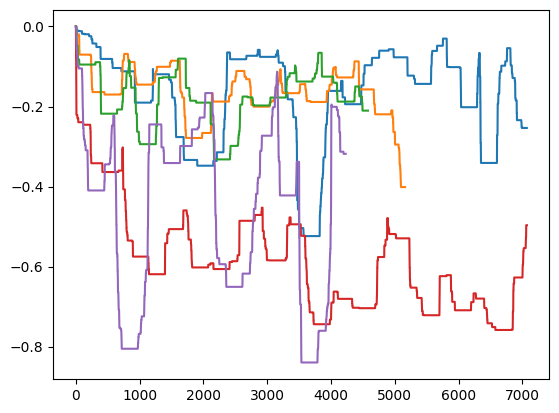

In [12]:
def drawdown(df, window=252):
    Roll_Max= df['Close'].rolling(window, min_periods=1).max()
    Daily_Drawdown= df['Close']/Roll_Max - 1.0
    Max_Daily_Drawdown= Daily_Drawdown.rolling(window,min_periods=1).min()
    
    return Max_Daily_Drawdown

drawdown(pd.read_csv("C:/Users/hsahn/Downloads/SPY.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/TLT.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/GLD.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/^VIX.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/USO.csv")).plot()

In [13]:
def DRAWDOWN_PERCENT(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Low'])
    
    maximum_value=max(stock_data['High'])
    minimum_value=min(stock_data['Low'])
    
    percent=(minimum_value-maximum_value)/maximum_value *100
    print(percent)
    
    
    
DRAWDOWN_PERCENT("SPY",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("TLT",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("GLD",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("^VIX",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("USO",'2006-10-4','2022-12-31') 

-90.48137444207025
-55.19754961375987
-78.90460240017386
-90.43895890136221
-98.22942023311373


In [14]:
def DRAWDOWN_DURATION(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Low'])
    
    maximum_value=max(stock_data['High'])
    minimum_value=min(stock_data['Low'])
    
    percent=(minimum_value-maximum_value)/maximum_value *100
    print(percent)
    
    
    
DRAWDOWN_DURATION("SPY",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("TLT",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("GLD",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("^VIX",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("USO",'2006-10-4','2022-12-31') 

-90.48137444207025
-55.19754961375987
-78.90460240017386
-90.43895890136221
-98.22942023311373


In [15]:
from datetime import date
def numOfDays(date1, date2):
    return (date2-date1).days

In [16]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
def DRAWDOWN_DURATION(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Volume'])

    
    xs = stock_data['Close']
    i = np.argmax(( np.maximum.accumulate(xs) - xs ) / np.maximum.accumulate(xs)) # end of the period
    j = np.argmax(xs[:i]) # start of period

    plt.plot(xs)
    plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=5)
    p=xs[i]
    q=xs[j]
    print(xs[i])
    print(xs[j])
        
    date1=xs[stock_data['Close'] == p].index.tolist()[0]
    date2=xs[stock_data['Close'] == q].index.tolist()[0]
    
    print(date1)
    print(date2)

    
    print(numOfDays(date2, date1), "days")
    

         

68.110001
156.479996
2009-03-09 00:00:00
2007-10-09 00:00:00
517 days


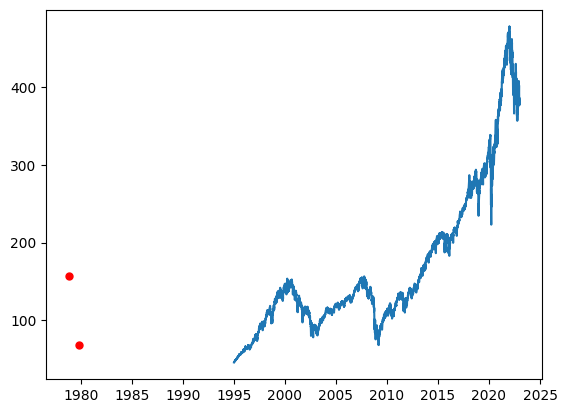

In [17]:
DRAWDOWN_DURATION("SPY",'1995-1-1','2022-12-31')

92.400002
171.570007
2003-06-26 00:00:00
2020-08-04 00:00:00
-6249 days


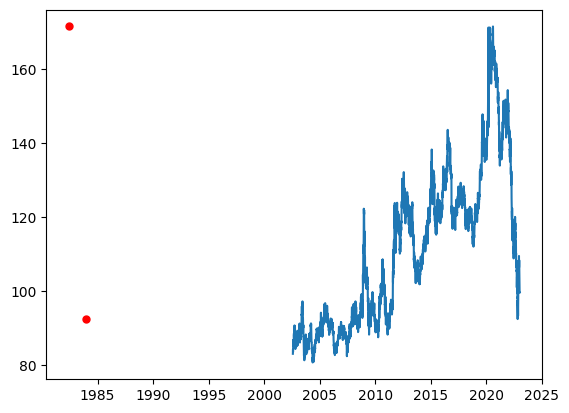

In [18]:
DRAWDOWN_DURATION("TLT",'1995-1-1','2022-12-31')

100.5
184.589996
2015-12-17 00:00:00
2011-08-22 00:00:00
1578 days


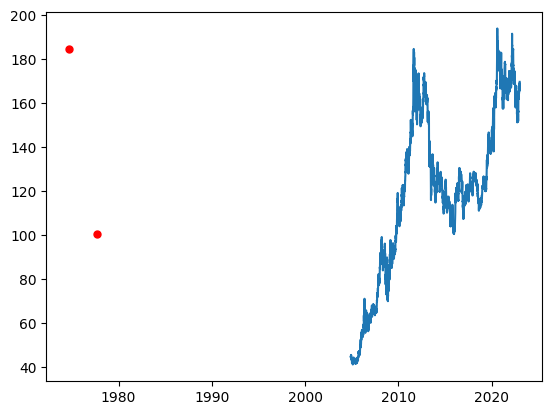

In [19]:
DRAWDOWN_DURATION("GLD",'1995-1-1','2022-12-31')

9.14
80.860001
2017-11-03 00:00:00
2008-11-20 00:00:00
3270 days


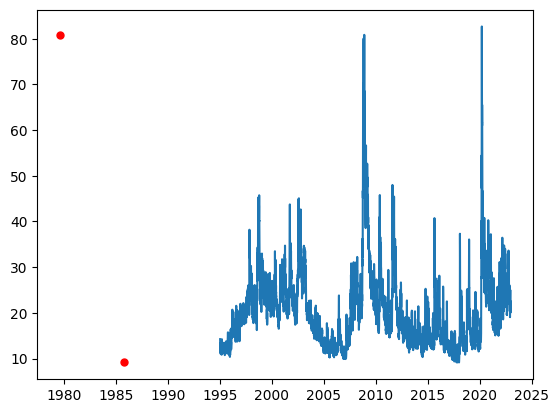

In [20]:
DRAWDOWN_DURATION("^VIX",'1995-1-1','2022-12-31')

17.040001
939.840027
2020-04-28 00:00:00
2008-07-14 00:00:00
4306 days


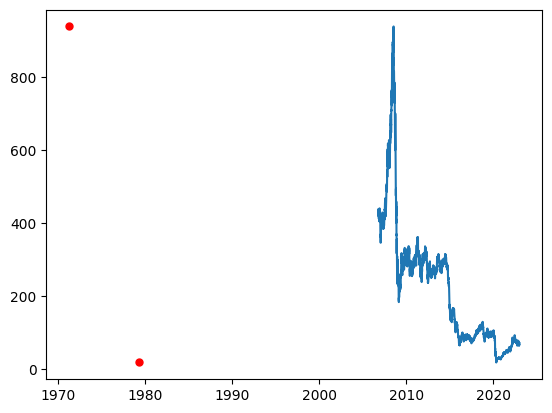

In [21]:
DRAWDOWN_DURATION("USO",'2006-10-4','2022-12-31')